## CS 340: Intro to Data Science

####Gabriel, Rishikesh and Essence

# **1. Problem Definition**

Supply Chain data is important for many businesses as it can play a significant role in the distribution of their products. For example, based on data from a Supply Chain dataset a organization may focused to invest their adds in areas where people buy more products online. Likewise, it will also help businesses to determine prices of its products and forecast sales. Governments may also be interested to know the situation of the Supply Chain to carry out effective economic and development plans.

This project's main goal is to study this dataset and analize its data to have a deeper understanding of what is behind different trends and to determine whether the sales profits will increase or decrease in the future years. Here, we will first collect the relevant data set, focused on how much was the profit in each year. Once we collect the data, we will prepare the data using pandas, numpy and visualize the data to determine the relationship between the variables. After studying the data set, we will preprocess the data using python where we will eliminate the outliers and manage missing values. Once we successfully preprocess the data, we will make use of python’s supervised learning packages and algorithms to build our model. Once we prepare the model, we will access the model based upon its accuracy, sensitivity, and specificity. If the model meets our requirements, we will deploy the model to make predictions on income level of individuals.

# **2. Why problem is important?**

Studying supply chain is important for several reasons, and it can be instrumental in predicting future strategies for a business. It can be important to Understand Demand-Supply Dynamics, Anticipate Supply Shortages or Surpluses, Identify Cost Savings Opportunities, and Enhance Forecasting and Planning. 

In this case, by studying the profit in the past years, we will be able to predict what will the profit look like in the years to come, which allows the company to decide what strategies to go for, such as decreasing the price in case the profit goes down. 

# **2. Understanding Dataset**

The original dataset was obtained from Kaggle, an online community of data scientists and machine learning practitioners. The DataSet of Supply Chains was used by the company DataCo Global for analysis, allowing the use of Machine Learning Algorithms and R Software. 

Areas of important registered activities: Provisioning , Production , Sales , Commercial Distribution. 

The most important information captured in this Supply Chain database consists of:

Days for Shipping: The amount of day that would take to deliver the order.

* Category Name: Category of each item, such as Sporting Goods or eletronics.
* Customer Segment: Informs if the costumer is Coporation, a Home Office or a regular customer. 
* Department Name: The department which the item sold belongs, such as Firness  or Technology Department.
* Order Country: Country where this order will be delivered to.
* Order State: The State in each country where the order is goinf to. 
* Order Item Profit Ratio: The profit in each order.
* Sales: The amount in sales for each order. 
* Shipping Date: When the order is supposed to be shipped.
* Shipping Mode: What kind of shipping method was chosen, such as First Class or Second Class.

Source: Kaggle

#**3. Importing modules**

In [ ]:
#dataframe
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Binarizer
from imblearn. over_sampling import SMOTE


#**4. Importing Dataset**

In [ ]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


#**5. Exploratory Data Analysis**

### Determining the shape of the dataset

In [ ]:
df.shape

(11943, 53)

As we can see, there are 180,519 rows (records) and 53 columns in our dataset.

###Listing the columns of the dataset

In [ ]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

### Replacing spaces (' ') between Column names with '_'

In [ ]:
columns= list(df.columns)
adder = ""
new_columns =[]
for each_column in columns:
    for letter in each_column:
        if letter==" ":
            adder = adder + "_"
        else:
            adder = adder + letter
    new_columns.append(adder)
    adder=""


###Replacing old columns with new_columns

In [ ]:
df.columns=new_columns

Our column names had too many spaces and we decided to change it to '_' to avoid any issues with Pandas

###Determining dataframe columns characteristics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11943 entries, 0 to 11942
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type                           11943 non-null  object 
 1   Days_for_shipping_(real)       11943 non-null  int64  
 2   Days_for_shipment_(scheduled)  11943 non-null  int64  
 3   Benefit_per_order              11943 non-null  float64
 4   Sales_per_customer             11943 non-null  float64
 5   Delivery_Status                11943 non-null  object 
 6   Late_delivery_risk             11943 non-null  int64  
 7   Category_Id                    11943 non-null  int64  
 8   Category_Name                  11943 non-null  object 
 9   Customer_City                  11943 non-null  object 
 10  Customer_Country               11943 non-null  object 
 11  Customer_Email                 11943 non-null  object 
 12  Customer_Fname                 11943 non-null 

###Listing datatypes of the columns

In [ ]:
df.dtypes

Type                              object
Days_for_shipping_(real)           int64
Days_for_shipment_(scheduled)      int64
Benefit_per_order                float64
Sales_per_customer               float64
Delivery_Status                   object
Late_delivery_risk                 int64
Category_Id                        int64
Category_Name                     object
Customer_City                     object
Customer_Country                  object
Customer_Email                    object
Customer_Fname                    object
Customer_Id                        int64
Customer_Lname                    object
Customer_Password                 object
Customer_Segment                  object
Customer_State                    object
Customer_Street                   object
Customer_Zipcode                   int64
Department_Id                      int64
Department_Name                   object
Latitude                         float64
Longitude                        float64
Market          

###Descriptive Analytics of quantitative variables in the dataframe

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Days_for_shipping_(real),11943.0,3.654442,1.545516,0.000000,2.000000,4.000000,5.000000,6.000000
Days_for_shipment_(scheduled),11943.0,3.085322,1.251830,0.000000,2.000000,4.000000,4.000000,4.000000
Benefit_per_order,11943.0,21.582287,110.543832,-3366.000000,6.835000,30.740000,64.940002,614.250000
Sales_per_customer,11943.0,181.839720,120.686932,8.470000,100.099998,155.160004,251.970001,1485.000000
Late_delivery_risk,11943.0,0.539228,0.498480,0.000000,0.000000,1.000000,1.000000,1.000000
Category_Id,11943.0,26.108683,16.538863,2.000000,17.000000,24.000000,29.000000,76.000000
Customer_Id,11943.0,7069.821318,4542.817232,1.000000,3420.500000,6746.000000,10080.000000,20755.000000
Customer_Zipcode,11943.0,29283.193754,36684.605594,603.000000,725.000000,957.000000,60649.000000,98632.000000
Department_Id,11943.0,4.579335,1.612280,2.000000,4.000000,4.000000,5.000000,12.000000
Latitude,11943.0,27.513113,9.865790,17.982491,18.250216,21.305620,37.304783,48.781933


The above table shows descriptive statistics for numerical variables in our dataset.

### Calculating and printing mode for categorical variables:

In [ ]:
def mode(list_of_nums):
    average = list_of_nums.mode()
    return average

categorical_var = list(df.select_dtypes(include=object).columns)

#printing mode of categorical variables
for item in categorical_var:
    print(item + " mode: "+ mode(df[item]))
    

0    Type mode: DEBIT
Name: Type, dtype: object
0    Delivery_Status mode: Late delivery
Name: Delivery_Status, dtype: object
0    Category_Name mode: Cleats
Name: Category_Name, dtype: object
0    Customer_City mode: Caguas
Name: Customer_City, dtype: object
0    Customer_Country mode: Puerto Rico
Name: Customer_Country, dtype: object
0    Customer_Email mode: XXXXXXXXX
Name: Customer_Email, dtype: object
0    Customer_Fname mode: Mary
Name: Customer_Fname, dtype: object
0    Customer_Lname mode: Smith
Name: Customer_Lname, dtype: object
0    Customer_Password mode: XXXXXXXXX
Name: Customer_Password, dtype: object
0    Customer_Segment mode: Consumer
Name: Customer_Segment, dtype: object
0    Customer_State mode: PR
Name: Customer_State, dtype: object
0    Customer_Street mode: 398 Emerald Grove
Name: Customer_Street, dtype: object
0    Department_Name mode: Apparel
Name: Department_Name, dtype: object
0    Market mode: Europe
Name: Market, dtype: object
0    Order_City mode: Santo Do

Above result shows the mode of each categorical columns in the dataset.

###Checking if any cells has missing values


In [ ]:
df.isnull().sum()

Type                                 0
Days_for_shipping_(real)             0
Days_for_shipment_(scheduled)        0
Benefit_per_order                    0
Sales_per_customer                   0
Delivery_Status                      0
Late_delivery_risk                   0
Category_Id                          0
Category_Name                        0
Customer_City                        0
Customer_Country                     0
Customer_Email                       0
Customer_Fname                       0
Customer_Id                          0
Customer_Lname                       0
Customer_Password                    0
Customer_Segment                     0
Customer_State                       0
Customer_Street                      0
Customer_Zipcode                     0
Department_Id                        0
Department_Name                      0
Latitude                             0
Longitude                            0
Market                               0
Order_City               

Above code checks whether there are any empty/blank cells in the dataset. As we can see, there are some empty cells in the **Customer_Zipcode, Order_Zipcode,Customer_Lname, and Product_Description** Collums 

In [ ]:
df['Order_Zipcode'].replace(np.nan, '0',inplace=True)
df['Product_Description'].replace(np.nan, '0',inplace=True)
df['Customer_Zipcode'].replace(np.nan, '0',inplace=True)
df['Customer_Lname'].replace(np.nan, '0',inplace=True)
df['Product_Image'].replace(np.nan, '0',inplace=True)
df['Product_Image'].replace(np.nan, '0',inplace=True)
df['Product_Name'].replace(np.nan, '0',inplace=True)
df['Product_Price'].replace(np.nan, '0',inplace=True)
df['Product_Status'].replace(np.nan, '0',inplace=True)
df['shipping_date_(DateOrders)'].replace(np.nan, '0',inplace=True)
df['Shipping_Mode'].replace(np.nan, '0',inplace=True)
df['Product_Card_Id'].replace(np.nan, '0',inplace=True)
df['Product_Category_Id'].replace(np.nan, '0',inplace=True)
df['Order_Item_Profit_Ratio'].replace(np.nan, '0',inplace=True)
df['Order_Item_Quantity'].replace(np.nan, '0',inplace=True)
df['Sales'].replace(np.nan, '0',inplace=True)
df['Order_Item_Total'].replace(np.nan, '0',inplace=True)
df['Order_Profit_Per_Order'].replace(np.nan, '0',inplace=True)
df['Order_Region'].replace(np.nan, '0',inplace=True)
df['Order_State'].replace(np.nan, '0',inplace=True)
df['Order_Status'].replace(np.nan, '0',inplace=True)



In [ ]:
df.isnull().sum()

Type                             0
Days_for_shipping_(real)         0
Days_for_shipment_(scheduled)    0
Benefit_per_order                0
Sales_per_customer               0
Delivery_Status                  0
Late_delivery_risk               0
Category_Id                      0
Category_Name                    0
Customer_City                    0
Customer_Country                 0
Customer_Email                   0
Customer_Fname                   0
Customer_Id                      0
Customer_Lname                   0
Customer_Password                0
Customer_Segment                 0
Customer_State                   0
Customer_Street                  0
Customer_Zipcode                 0
Department_Id                    0
Department_Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order_City                       0
Order_Country                    0
Order_Customer_Id                0
order_date_(DateOrde

Checking again after the change was made and we are all good.

### Now, we will be determining different attributes for categorical variables

In [ ]:
categorical_var = list(df.select_dtypes(include=object).columns)
for item in categorical_var:
    print(item + ":")
    print(df[item].unique())

Type:
['DEBIT' 'TRANSFER' 'CASH' 'PAYMENT']
Delivery_Status:
['Advance shipping' 'Late delivery' 'Shipping on time' 'Shipping canceled']
Category_Name:
['Sporting Goods' 'Cleats' 'Shop By Sport' "Women's Apparel" 'Electronics'
 'Boxing & MMA' 'Cardio Equipment' 'Trade-In' "Kids' Golf Clubs"
 'Hunting & Shooting' 'Baseball & Softball' "Men's Footwear"
 'Camping & Hiking' 'Consumer Electronics' 'Cameras ' 'Computers'
 'Basketball' 'Soccer' "Girls' Apparel" 'Accessories' "Women's Clothing"
 'Crafts' "Men's Clothing" 'Tennis & Racquet' 'Fitness Accessories'
 'As Seen on  TV!' 'Golf Balls' 'Strength Training' "Children's Clothing"
 'Lacrosse' 'Baby ' 'Fishing' 'Books ' 'DVDs' 'CDs ' 'Garden' 'Hockey'
 'Pet Supplies' 'Health and Beauty' 'Music' 'Video Games']
Customer_City:
['Caguas' 'San Jose' 'Los Angeles' 'Tonawanda' 'Miami' 'San Ramon'
 'Freeport' 'Salinas' 'Peabody' 'Canovanas' 'Paramount' 'Mount Prospect'
 'Long Beach' 'Rancho Cordova' 'Billings' 'Wilkes Barre' 'Roseville'
 'Bellflower

Here, we do not see any placeholders like '?' which represents a missing or unknown value. So, we are good to go.

# **6. Data Visualization**

### a. Categorical Variables

In [ ]:
categorical_var = list(df.select_dtypes(include=object).columns)

Creating bargraph for Delivery_Type

### Graph representing days of shipping(real), days of shipping(expected) for different Delivery_Status

Text(0.5, 0, '\n Delivery Status')

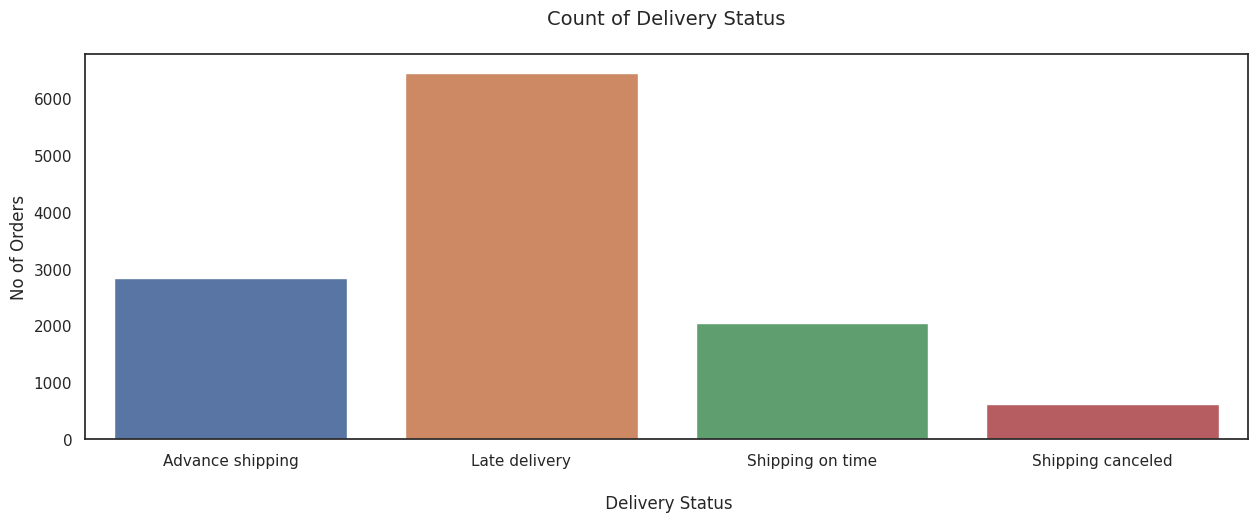

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="Delivery_Status", data=df)
plt.title("Count of Delivery Status\n",size =14)
plt.ylabel("No of Orders")
plt.xlabel("\n Delivery Status")

This graph shows that most of the orders had a Late Delivery Status

### Now we have to filter the DateOrders collum to obtain the only the year the orders were placed so we can make predictions over the foture years. 

In [ ]:
df['order_date_(DateOrders)'].head(20)

0     1/31/2018 22:56
1     1/13/2018 12:27
2     1/13/2018 12:06
3     1/13/2018 11:45
4     1/13/2018 11:24
5     1/13/2018 11:03
6     1/13/2018 10:42
7     1/13/2018 10:21
8     1/13/2018 10:00
9      1/13/2018 9:39
10     1/13/2018 9:18
11     1/13/2018 8:57
12     1/13/2018 8:36
13     1/13/2018 8:15
14     1/13/2018 7:54
15     1/13/2018 7:33
16     1/13/2018 7:12
17     1/13/2018 6:51
18     1/13/2018 6:30
19     1/13/2018 6:09
Name: order_date_(DateOrders), dtype: object

In [ ]:
date=[]
for i in df['order_date_(DateOrders)']:
    date.append(i.split())

for j in date:
    del j[1]

YearOrdered=[]
for k in date:
    YearOrdered.append(k[0].split('/'))

for j in YearOrdered:
    del j[0]

for j in YearOrdered:
    del j[0]

#print(YearOrdered)


#df['order_date_(DateOrders)'] = YearOrdered

In [ ]:
se = pd.array(YearOrdered)
df['Year'] = np.array(YearOrdered)

#df.loc[:,'Year']

Text(0.5, 0, '\n Year')

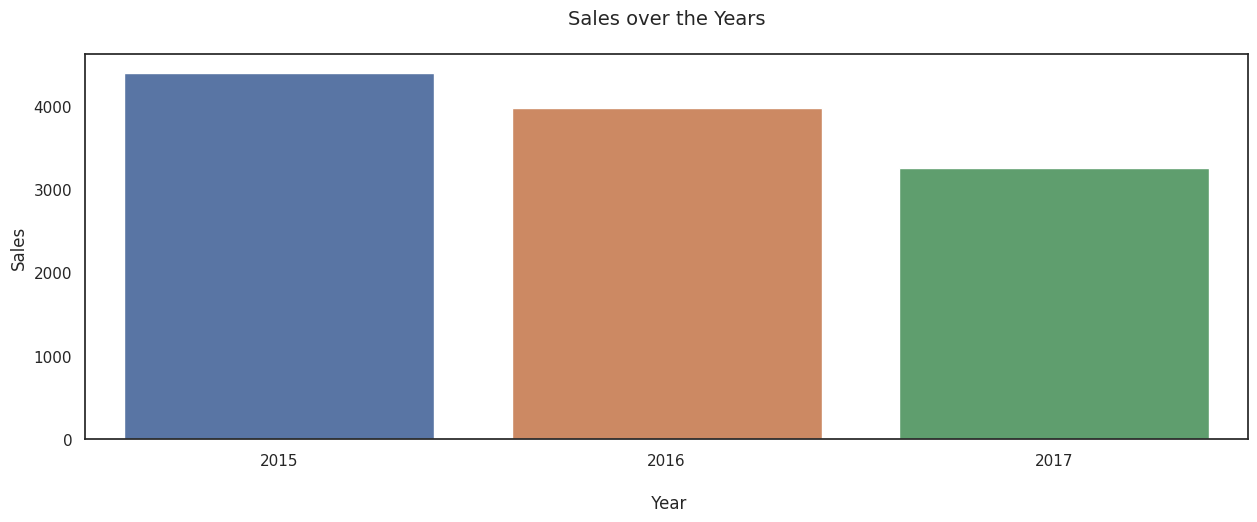

In [ ]:

plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.countplot(x="Year", data=df, order= ['2015','2016','2017'])
plt.title("Sales over the Years\n",size =14)
plt.ylabel("Sales")
plt.xlabel("\n Year")



Unlike expected, sale seem to be oging down. We should disconsider 2018 since we do not have the data for the whole year. 

### Barchart representing the relationship between Benefit Per Order with Delivery Status

Text(0.5, 0, '\n Delivery Status')

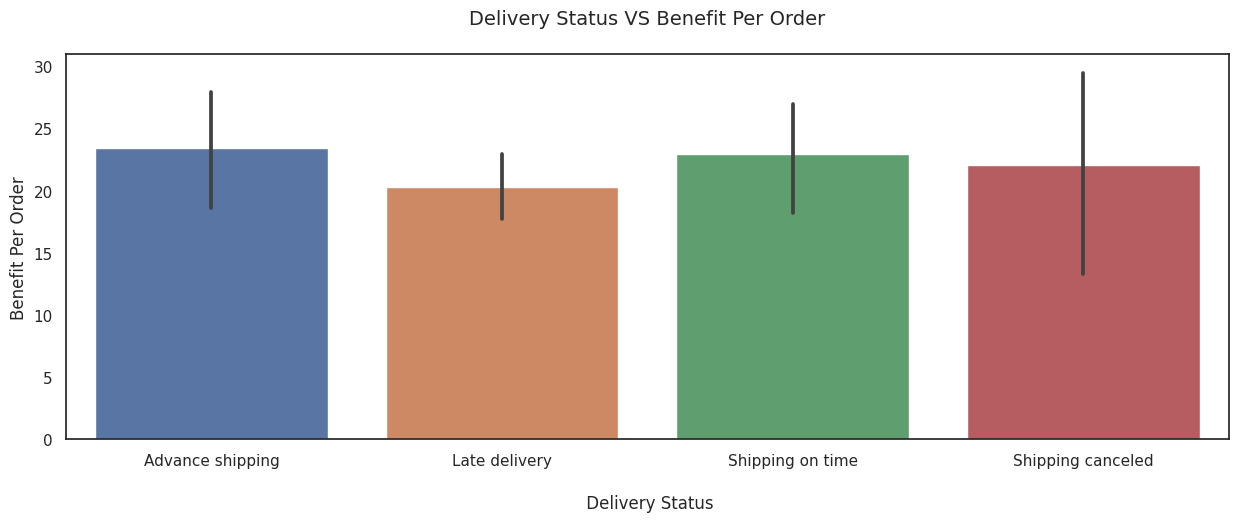

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style = 'white')
sns.barplot(x="Delivery_Status", y="Benefit_per_order", data=df)
plt.title("Delivery Status VS Benefit Per Order\n",size =14)
plt.ylabel("Benefit Per Order")
plt.xlabel("\n Delivery Status")

This graph shows how On Time Shipping get the most Benefit per Order

### Graph representing the count for Category Name of Goods

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'Sporting Goods'),
  Text(1, 0, 'Cleats'),
  Text(2, 0, 'Shop By Sport'),
  Text(3, 0, "Women's Apparel"),
  Text(4, 0, 'Electronics'),
  Text(5, 0, 'Boxing & MMA'),
  Text(6, 0, 'Cardio Equipment'),
  Text(7, 0, 'Trade-In'),
  Text(8, 0, "Kids' Golf Clubs"),
  Text(9, 0, 'Hunting & Shooting'),
  Text(10, 0, 'Baseball & Softball'),
  Text(11, 0, "Men's Footwear"),
  Text(12, 0, 'Camping & Hiking'),
  Text(13, 0, 'Consumer Electronics'),
  Text(14, 0, 'Cameras '),
  Text(15, 0, 'Computers'),
  Text(16, 0, 'Basketball'),
  Text(17, 0, 'Soccer'),
  Text(18, 0, "Girls' Apparel"),
  Text(19, 0, 'Accessories'),
  Text(20, 0, "Women's Clothing"),
  Text(21, 0, 'Crafts'),
  Text(22, 0, "Men's Clothing"),
  Text(23, 0, 'Tennis & Racquet'),
  Text(24, 0, 'Fitness Accessories'),
  Text(25, 0, 'As 

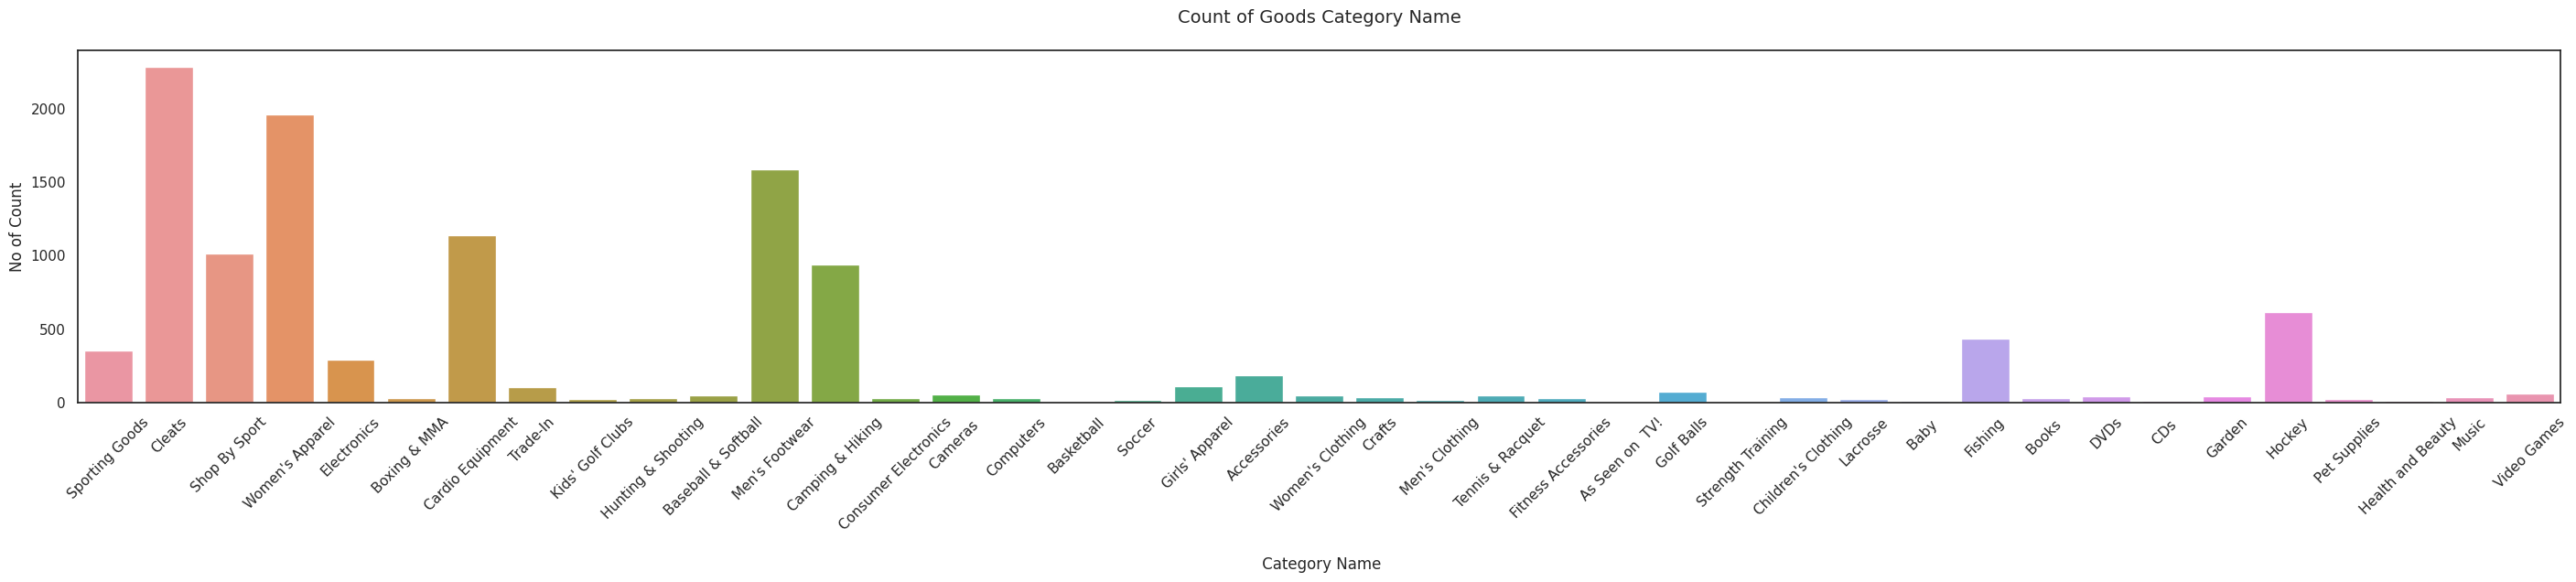

In [ ]:
plt.figure(figsize=(35,5))
sns.set(style = 'white')
sns.countplot(x="Category_Name", data=df)
plt.title("Count of Goods Category Name\n",size =14)
plt.ylabel("No of Count")
plt.xlabel("\n Category Name")
plt.xticks(rotation=45)

As we can see, Sporting Goods, Indoor/Outdoor Games and Baseball & Softball are the item they have the most in stock. 

### Pie Chart representing the count for Shipping Mode of Goods

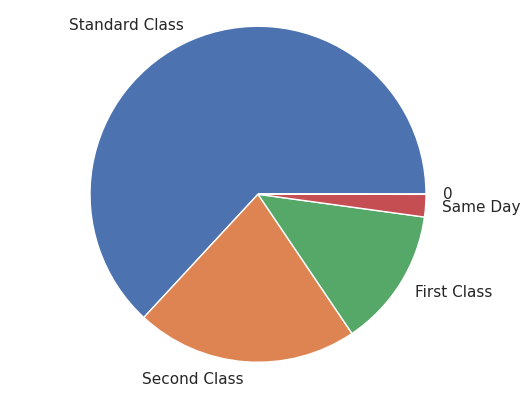

In [ ]:

fig1, ax1 = plt.subplots()
X = list(df['Shipping_Mode'].value_counts().index)
Y = list(df['Shipping_Mode'].value_counts().values)
ax1.pie(Y,labels=X)
ax1.axis('equal') 
plt.show()


Standart Class is the most used, followed by Second Class and First. 

### Variation between Days for Shipping(real) and Benefit Per Order

Text(0.5, 1.0, 'Box plot representing Days for Shipping and Benefit Per Order \n')

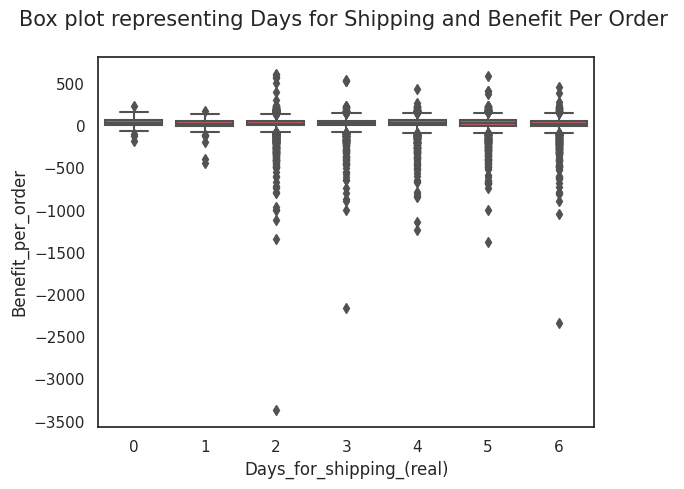

In [ ]:
sns.boxplot(x=df['Days_for_shipping_(real)'],y=df['Benefit_per_order'],color='r')
plt.title("Box plot representing Days for Shipping and Benefit Per Order \n", size = 15)

### Variation between Product Price and Benefit Per Order

Text(0.5, 1.0, 'Box plot representing Product Price and Benefit Per Order \n')

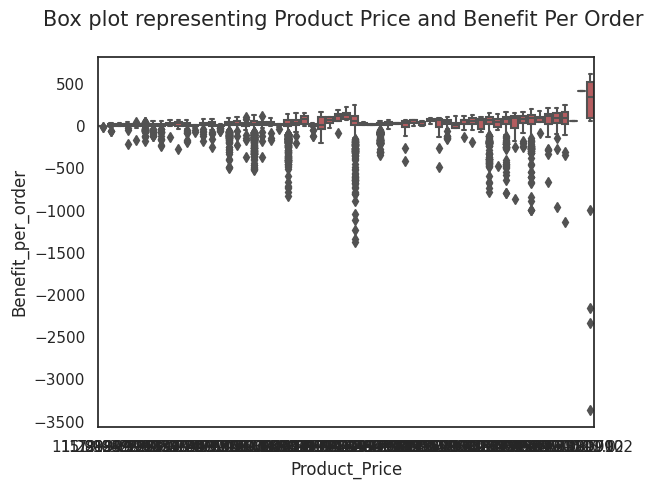

In [ ]:
sns.boxplot(x=df['Product_Price'],y=df['Benefit_per_order'],color='r')
plt.title("Box plot representing Product Price and Benefit Per Order \n", size = 15)

### Scatterplot representing relationship between Sales per Customer and Benefit Per Order as per Delivery Status

Text(0.5, 1.0, 'Relationship between Sales per Customer and Benefit Per Order as per Delivery Status')

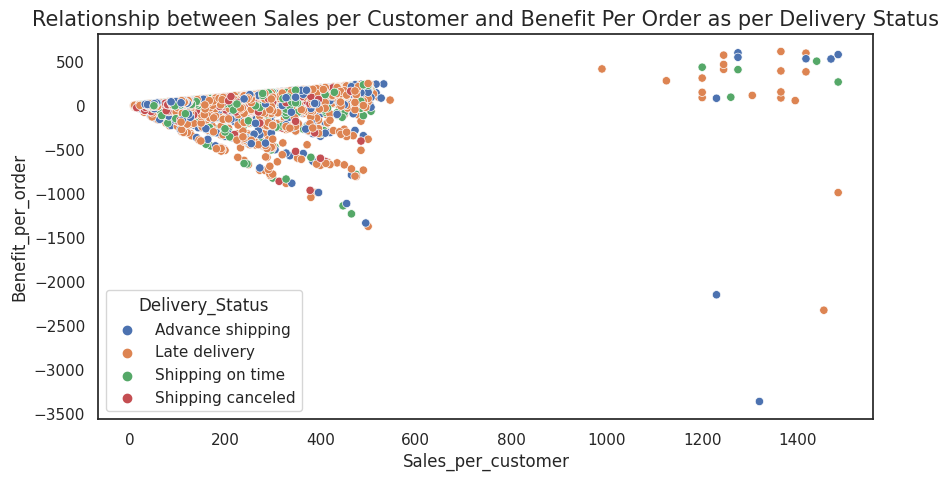

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="Sales_per_customer",y="Benefit_per_order",hue="Delivery_Status",data=df)
plt.title('Relationship between Sales per Customer and Benefit Per Order as per Delivery Status',size=15)

#**7. Data Preprocessing**

Data Preprocessing is an important step in predictive analytics. It helps us to eliminate outliers, manage missing values, and handle categorical variables. Our data preprocessing steps includes:
- Dropping Variables
- Data Scaling(Normalization/ Standardization)
- Missing Value Imputation (Was done earlier in the code)

### a. Dropping Variables

In [ ]:
#Dropping Numerical Variables with Zero Variance
df.std()

<ipython-input-28-cb4b1b98ab73>:2: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


Days_for_shipping_(real)             1.545516
Days_for_shipment_(scheduled)        1.251830
Benefit_per_order                  110.543832
Sales_per_customer                 120.686932
Late_delivery_risk                   0.498480
Category_Id                         16.538863
Customer_Id                       4542.817232
Customer_Zipcode                 36684.605594
Department_Id                        1.612280
Latitude                             9.865790
Longitude                           21.063133
Order_Customer_Id                 4542.817232
Order_Id                         21577.612697
Order_Item_Cardprod_Id             334.010498
Order_Item_Discount                 22.255595
Order_Item_Discount_Rate             0.070626
Order_Item_Id                    53008.986144
Order_Item_Product_Price           130.234442
Order_Item_Profit_Ratio              0.460543
Order_Item_Quantity                  1.588501
Sales                              133.627943
Order_Item_Total                  

In [ ]:
#Dropping Categorical Variables with zero variation
categorical_var = list(df.select_dtypes(include=object).columns)
zero_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)==1:
        zero_cardinality.append(column)
zero_cardinality

['Customer_Email', 'Customer_Password', 'Product_Description']

In [ ]:
#Dropping Categorical Variables with Multiple Levels:
high_cardinality = []
for column in categorical_var:
    if len(df[column].value_counts().index)>100:
        high_cardinality.append(column)
high_cardinality

['Customer_City',
 'Customer_Fname',
 'Customer_Lname',
 'Customer_Street',
 'Order_City',
 'Order_Country',
 'order_date_(DateOrders)',
 'Order_State',
 'Order_Zipcode',
 'shipping_date_(DateOrders)']

The categorical variables with Multiple Levels are still important to us so we will be dropping only the ones with Zero Variance plus any columns that will not be valuable for this study. 

In [ ]:
#Dropping relationship column
df=df.drop('Customer_Email',axis=1)
df=df.drop('Customer_Password',axis=1)
df=df.drop('Product_Description',axis=1)
df=df.drop('Product_Image',axis=1)
df=df.drop('Product_Status',axis=1)
df=df.drop('Order_Zipcode',axis=1)
df=df.drop('Customer_City',axis=1)
df=df.drop('Customer_Country',axis=1)
df=df.drop('Customer_Fname',axis=1)
df=df.drop('Customer_Lname',axis=1)
df=df.drop('Customer_Id',axis=1)
df=df.drop('Customer_Street',axis=1)
df=df.drop('Customer_State',axis=1)
df=df.drop('Customer_Zipcode',axis=1)
df=df.drop('Latitude',axis=1)
df=df.drop('Longitude',axis=1)
df=df.drop('Order_City',axis=1)
df=df.drop('Order_Id',axis=1)
df=df.drop('Order_State',axis=1)
df=df.drop('Market',axis=1)
df=df.drop('Order_Customer_Id',axis=1)
df=df.drop('Order_Item_Cardprod_Id',axis=1)
df=df.drop('Order_Item_Id',axis=1)

In [ ]:
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name',
       'Customer_Segment', 'Department_Id', 'Department_Name', 'Order_Country',
       'order_date_(DateOrders)', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_Status', 'Product_Card_Id', 'Product_Category_Id',
       'Product_Name', 'Product_Price', 'shipping_date_(DateOrders)',
       'Shipping_Mode', 'Year'],
      dtype='object')

From 53 to 40 Columns

### b. Standardizing Numerical Variables

For the purpose of this project, we will standardize the numerical variables. While there is no any specific way to determine whether to normalize or standardize, we chose standardization as our model uses multiple numerical variables. 

In [ ]:

#Standarizing numerical variables
numerical_var = list(df.select_dtypes(exclude=object).columns)
array = df[numerical_var].values
scaler = StandardScaler().fit(array)
df[numerical_var] = pd.DataFrame(scaler.transform(array))


In [ ]:
#checking in our numerical variables are not standarized
df[numerical_var].head()

,Days_for_shipping_(real),Days_for_shipment_(scheduled),Benefit_per_order,Sales_per_customer,Late_delivery_risk,Category_Id,Department_Id,Order_Item_Discount,Order_Item_Discount_Rate,Order_Item_Product_Price,Order_Item_Profit_Ratio,Order_Item_Quantity,Sales,Order_Item_Total,Order_Profit_Per_Order,Product_Card_Id,Product_Category_Id,Product_Price
0,-0.423463,0.730703,0.630253,1.100416,-1.081791,2.835339,-1.599873,-0.351034,-0.895589,1.605608,0.364679,-0.958532,0.935385,1.100416,0.630253,2.413851,2.835339,1.605608
1,0.870657,0.730703,-2.448654,1.073237,0.924393,2.835339,-1.599873,-0.203649,-0.753993,1.605608,-2.002190,-0.958532,0.935385,1.073237,-2.448654,2.413851,2.835339,1.605608
2,0.223597,0.730703,-2.436803,1.059648,-1.081791,2.835339,-1.599873,-0.129957,-0.612397,1.605608,-2.002190,-0.958532,0.935385,1.059648,-2.436803,2.413851,2.835339,1.605608
3,-0.423463,0.730703,0.011559,1.018962,-1.081791,2.835339,-1.599873,0.090671,-0.470801,1.605608,-0.091323,-0.958532,0.935385,1.018962,0.011559,2.413851,2.835339,1.605608
4,-1.070524,0.730703,1.018894,0.964604,-1.081791,2.835339,-1.599873,0.385441,-0.187609,1.605608,0.712110,-0.958532,0.935385,0.964604,1.018894,2.413851,2.835339,1.605608


### c. Data Imputation

Was done in the Data visualization Process

#**8. Predictive analytics**

Fitting a Model

Predictive analytics can be divided into three parts:<br>
a) Supervised Learning <br>
b) Unsupervised Learning<br>
c) Reinforcement Learning<br>

Our project falls under supervised learning category as have a target variable (profit) generated by feeding other input variables. Specifically, it falls under classification as we are predicting binary outcomes (i.e. whether its profit or loss). The classification algorithms used to test our model are:
<br>
Logistic Regression<br>
Decision Trees<br>
Random Forest<br>
K-NN<br>
Vector Machine<br>
Neural Network<br>

Importing Clasification Algorithms

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

In [ ]:
df.columns

Index(['Type', 'Days_for_shipping_(real)', 'Days_for_shipment_(scheduled)',
       'Benefit_per_order', 'Sales_per_customer', 'Delivery_Status',
       'Late_delivery_risk', 'Category_Id', 'Category_Name',
       'Customer_Segment', 'Department_Id', 'Department_Name', 'Order_Country',
       'order_date_(DateOrders)', 'Order_Item_Discount',
       'Order_Item_Discount_Rate', 'Order_Item_Product_Price',
       'Order_Item_Profit_Ratio', 'Order_Item_Quantity', 'Sales',
       'Order_Item_Total', 'Order_Profit_Per_Order', 'Order_Region',
       'Order_Status', 'Product_Card_Id', 'Product_Category_Id',
       'Product_Name', 'Product_Price', 'shipping_date_(DateOrders)',
       'Shipping_Mode', 'Year'],
      dtype='object')

In [ ]:
input_var  = set(['Sales','Order_Profit_Per_Order','Product_Price','Year'])
X = df[input_var]
Y = df['Benefit_per_order']

models = ['LogisticReg', 'DecisionTree', 'RandomForest', 'KNN','Support Vector Machine','Neural Networks']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.70, random_state=42)


<ipython-input-54-3ddc8993a115>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[input_var]


Logistic Regression

In [ ]:
# Logistic Regression
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(Y_train)

lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr',max_iter=1000) # creates a lR instance
lr.fit(X_train, y_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='ovr', random_state=0)

Decision Trees

In [ ]:
# Decision Trees
dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
dt.fit(X_train, y_transformed)

DecisionTreeClassifier(max_depth=15)

Random Forest

In [ ]:
# Random Forests
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, y_transformed)

RandomForestClassifier(max_depth=5, random_state=0)

KNN

In [ ]:
# K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_transformed)

KNeighborsClassifier()

Support Vector Machines

In [ ]:
#Support Vector Machines
SVM = svm.LinearSVC()
SVM.fit(X_train, y_transformed)

 Neural Networks

In [ ]:
#Neural Networks
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X_train, y_transformed)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

### Model Assessment and Making Predictions

In [ ]:
# computes the confusion matrix and performence indicators
def get_performances(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y.round())
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [ ]:
pred_Y_lr = lr.predict(X_test) # predicts the Y given the fitted model lr

pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model dt

pred_Y_rf = rf.predict(X_test) # predicts the Y given the fitted model rf

pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

pred_Y_svm = SVM.predict(X_test) # predicts the Y given the fitted model Support Vector Machines

pred_Y_nn = NN.predict(X_test) # predicts the Y given the fitted model Neural Networks

In [ ]:
y_transformed_test = lab.fit_transform(Y_test)

# accuracy, sensitivity, and specificity for model lr
accuracy_lr, sensitivity_lr, specificity_lr = get_performances(y_transformed_test, pred_Y_lr)


# accuracy, sensitivity, and specificity for model dt
accuracy_dt, sensitivity_dt, specificity_dt = get_performances(y_transformed_test, pred_Y_dt)


# accuracy, sensitivity, and specificity for model rf
accuracy_rf, sensitivity_rf, specificity_rf = get_performances(y_transformed_test, pred_Y_rf)

# accuracy, sensitivity, and specificity for model knn
accuracy_knn, sensitivity_knn, specificity_knn = get_performances(y_transformed_test, pred_Y_knn)

# accuracy, sensitivity, and specificity for model Support Vector Machines
accuracy_svm, sensitivity_svm, specificity_svm = get_performances(y_transformed_test, pred_Y_svm)

# accuracy, sensitivity, and specificity for model Neural Networks
accuracy_nn, sensitivity_nn, specificity_nn = get_performances(y_transformed_test, pred_Y_nn)


<ipython-input-44-b22bf3927c77>:6: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
<ipython-input-44-b22bf3927c77>:7: RuntimeWarning: invalid value encountered in long_scalars
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
<ipython-input-44-b22bf3927c77>:6: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
<ipython-input-44-b22bf3927c77>:7: RuntimeWarning: invalid value encountered in long_scalars
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
<ipython-input-44-b22bf3927c77>:6: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
<ipython-input-44-b22bf3927c77>:7: RuntimeWarning: invalid value encountered in long_scalars
  specificity = cm[1,1]/(cm[1,0]+cm[1,1])
<ipython-input-44-b22bf3927c77>:6: RuntimeWarning: invalid value encountered in long_scalars
  sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
<ipython-input-44-b22bf3927c77>:7: RuntimeWarning: inva

Building a dataframe using the performance indicators so that we can compare the models easily

In [ ]:

perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn,accuracy_svm,accuracy_nn], 
                    columns = ['accuracy'], 
                    index = ['Logistic Regression',
                             'Decision Trees', 'Random Forest','K-NN','Support Vector Machine','Neural Networks'])

perf['sensitivity'] = np.asarray([sensitivity_lr,
                                  sensitivity_dt, 
                                  sensitivity_rf,
                                  sensitivity_knn,sensitivity_svm,sensitivity_nn])

perf['specificity'] = np.asarray([specificity_lr,
                                  specificity_dt,
                                  specificity_rf,
                                  specificity_knn,specificity_svm,specificity_nn])
perf

,accuracy,sensitivity,specificity
Logistic Regression,0.000000,NaN,NaN
Decision Trees,0.000000,NaN,NaN
Random Forest,0.000000,NaN,NaN
K-NN,0.000109,1.0,0.0
Support Vector Machine,0.000000,NaN,NaN
Neural Networks,0.000000,NaN,NaN


### ROC Curves

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
score_Y_nn = NN.predict_proba(X_test)
score_Y_nn 

array([[0.00036012, 0.0003614 , 0.00036698, ..., 0.00036022, 0.00035797,
        0.00036569],
       [0.00036012, 0.0003614 , 0.00036698, ..., 0.00036022, 0.00035797,
        0.00036569],
       [0.00036012, 0.0003614 , 0.00036698, ..., 0.00036022, 0.00035797,
        0.00036569],
       ...,
       [0.00036012, 0.0003614 , 0.00036698, ..., 0.00036022, 0.00035797,
        0.00036569],
       [0.00036012, 0.0003614 , 0.00036698, ..., 0.00036022, 0.00035797,
        0.00036569],
       [0.00036012, 0.0003614 , 0.00036698, ..., 0.00036022, 0.00035797,
        0.00036569]])

In [ ]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_transformed_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

ValueError: ignored

In [ ]:
score_Y_nn = NN.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_transformed_test, score_Y_nn[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkred',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='pink', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Feature Importance using Random Forest


In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

clf.fit(X_train, y_transformed)

RandomForestClassifier(random_state=0)

Plotting Predicted Sales per Year

In [ ]:
sample_df = df.sample(frac=0.70)

plt.figure(figsize=(10,5))
sns.lineplot(x=sample_df['Year'],y=pred_Y_lr,hue=None)
plt.title('Predicting Sales per Year',size=15)

ValueError: ignored

<Figure size 1000x500 with 0 Axes>

In [ ]:

ft_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

ft_scores

In [ ]:
#plotting ft_scores to visualize significance of individual column
plt.figure(figsize = (17,10))
plt.xlabel('Columns')
plt.ylabel('feature_scores \n')
plt.tight_layout()

ft_scores.plot.bar()



#**9. Implications of the project for future studies**


This data set can be very useful to analize trends in the market. Studying a supply chain data set can provide a real-world understanding of the complex interdependencies and relationships between various components of a supply chain. By analyzing data related to sourcing, production, distribution, and delivery of goods or services, students can gain insights into the challenges, risks, and opportunities that companies face in managing their supply chains. Studying supply chain data can also help students develop skills in data analysis, critical thinking, problem-solving, and decision-making, which are highly valued in today's business world. 

 This model can be used to analyze data of any year an if updated, the dataset could be analized again so new predictions and conclusions could be made according to the new data. By adding more recent sales data to the dataset, we can also build a predictive model which  will be able to aid the company in its decisions.


#**10. Why this model is better?**

Because we approached the dataset with curiosity and in our attempts to read the data we were able to analize different patterns and comprehend better the relationship between different attributes, such as Order Benefit and Delivery Status.